# Data Loading & Initial Inspection

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
df=pd.read_csv("heart_disease.csv")

### Use .head() to show first 5 records

In [3]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


### Use .shape to show rows and columns number

In [4]:
df.shape

(10000, 21)

### Use .info() to show column names and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

### Use .describe() to show basic details of columns

In [6]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


### Brief Observations

Dataset Size:
- The dataset contains **10,000 rows and 21 columns**.
- This is a **decently large, ML-friendly dataset** enough signal to train serious models without crying over variance.

Types of Features:
- **Numerical features (9):**  
  Age, Blood Pressure, Cholesterol Level, BMI, Sleep Hours, Triglyceride Level, Fasting Blood Sugar, CRP Level, Homocysteine Level

- **Categorical features (12):**  
  Gender, Exercise Habits, Smoking, Family Heart Disease, Diabetes, High Blood Pressure, Low HDL Cholesterol, High LDL Cholesterol, Alcohol Consumption, Stress Level, Sugar Consumption, Heart Disease Status (target)

- Target variable **Heart Disease Status** is **categorical (Yes/No)**: classic **binary classification** setup.

Immediate Issues & Red Flags:
-  **Missing values present** in almost every column (notably Alcohol Consumption with ~25% missing).
-  Categorical variables are **string-based** : will require encoding (One-Hot / Ordinal).
-  Features are on **very different scales** (e.g., CRP vs Cholesterol) : **scaling required**.
-  Some features are **medically correlated** (BP, cholesterol, triglycerides) : potential **multicollinearity**.
-  Target has **no missing values** : good, no label leakage headache.

# Data Cleaning & Preprocessing

## Missing Values

In [7]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [8]:
num_cols= df.select_dtypes(include="float64").columns
cat_cols= df.select_dtypes(exclude="float64").columns

In [9]:
num_cols

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')

In [10]:
cat_cols

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')

### Handle missing values

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
num_imputer= SimpleImputer(strategy="median")
cat_imputer= SimpleImputer(strategy="most_frequent")

In [13]:
df[num_cols]= num_imputer.fit_transform(df[num_cols])
df[cat_cols]= cat_imputer.fit_transform(df[cat_cols])

In [14]:
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

### Reason to choose this method

1. ML models cannot handle missing values, so imputation is required.  
2. Median is used for numerical data because it is robust to outliers.  
3. Most frequent / “Unknown” is used for categorical data to preserve patterns.  
4. Pipelines ensure the same preprocessing for training and testing.  
5. This approach is simple, reliable, and suitable for real-world ML projects.

## Duplicates

In [15]:
df.duplicated().sum()

np.int64(0)

No duplicate rows/ records

## Data Types

In [16]:
df.head(1)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.0,12.969246,12.38725,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

### Incorrect data types

No numerical column has an incorrect data type; all numerical features are correctly stored as `float64`.
The target column **Heart Disease Status** and other categorical features are stored as `object`, which is expected at the raw data stage.

### Encoding categorical columns

In [18]:
df["Heart Disease Status"] = df["Heart Disease Status"].map({"No": 0,"Yes": 1})

In [19]:
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

In [20]:
cat_cols = X.select_dtypes(include="object").columns

In [21]:
X_encoded = pd.get_dummies(X,columns=cat_cols,drop_first=False)

In [22]:
df = pd.concat([X_encoded, y], axis=1)

In [23]:
df.shape

(10000, 36)

In [24]:
df.head(1)

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Female,...,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status
0,56.0,153.0,155.0,24.991591,7.633228,342.0,120.0,12.969246,12.38725,False,...,True,False,False,False,False,True,False,False,True,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10000 non-null  float64
 1   Blood Pressure              10000 non-null  float64
 2   Cholesterol Level           10000 non-null  float64
 3   BMI                         10000 non-null  float64
 4   Sleep Hours                 10000 non-null  float64
 5   Triglyceride Level          10000 non-null  float64
 6   Fasting Blood Sugar         10000 non-null  float64
 7   CRP Level                   10000 non-null  float64
 8   Homocysteine Level          10000 non-null  float64
 9   Gender_Female               10000 non-null  bool   
 10  Gender_Male                 10000 non-null  bool   
 11  Exercise Habits_High        10000 non-null  bool   
 12  Exercise Habits_Low         10000 non-null  bool   
 13  Exercise Habits_Medium      1000

### Reason to encode columns

1. Machine learning models **cannot work with categorical (text) data** directly.  
2. Converting categories to numbers allows the model to **understand and process patterns**.  
3. One-Hot Encoding avoids creating a **false order** between categories.  
4. Separating the target prevents **data leakage** during analysis and modeling.  
5. This conversion makes the dataset **fully numeric**, which is required for EDA, correlation analysis, and model training.

## Feature Engineering

In [44]:
df.head(1)

,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Female,Gender_Male,Exercise Habits_High,Exercise Habits_Low,Exercise Habits_Medium,Smoking_No,Smoking_Yes,...,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status,Age_Group,BMI_Category,High_Cholesterol,High_BP,Poor_Sleep,High_Triglycerides
0,120.0,12.969246,12.38725,False,True,True,False,False,False,True,...,False,False,True,0,2,2,0,1,0,1


In [29]:
df["Age_Group"] = pd.cut(df["Age"],bins=[17, 30, 45, 60, 80],labels=[0, 1, 2, 3]).astype(int)

In [33]:
df=df.drop("Age",axis=1)

In [35]:
df["BMI_Category"] = pd.cut(df["BMI"],bins=[0, 18.5, 24.9, 29.9, 40],labels=[0, 1, 2, 3]).astype(int)
df=df.drop("BMI",axis=1)

In [37]:
df["High_Cholesterol"] = (df["Cholesterol Level"] > 240).astype(int)
df=df.drop("Cholesterol Level",axis=1)

In [39]:
df["High_BP"] = (df["Blood Pressure"] >= 140).astype(int)
df=df.drop("Blood Pressure",axis=1)

In [41]:
df["Poor_Sleep"] = (df["Sleep Hours"] < 6).astype(int)
df=df.drop("Sleep Hours",axis=1)

In [43]:
df["High_Triglycerides"] = (df["Triglyceride Level"] > 200).astype(int)
df=df.drop("Triglyceride Level",axis=1)

### New Features created

- **Age_Group**: Groups age into life stages to capture non-linear heart disease risk.
- **BMI_Category**: Categorizes BMI into clinical ranges reflecting obesity-related risk.
- **High_Cholesterol**: Binary flag indicating clinically high cholesterol levels.
- **High_BP**: Binary flag for hypertension based on blood pressure threshold.
- **Poor_Sleep**: Binary indicator for insufficient sleep duration.
- **High_Triglycerides**: Binary flag for elevated triglyceride levels.

# Univariate Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fasting Blood Sugar         10000 non-null  float64
 1   CRP Level                   10000 non-null  float64
 2   Homocysteine Level          10000 non-null  float64
 3   Gender_Female               10000 non-null  bool   
 4   Gender_Male                 10000 non-null  bool   
 5   Exercise Habits_High        10000 non-null  bool   
 6   Exercise Habits_Low         10000 non-null  bool   
 7   Exercise Habits_Medium      10000 non-null  bool   
 8   Smoking_No                  10000 non-null  bool   
 9   Smoking_Yes                 10000 non-null  bool   
 10  Family Heart Disease_No     10000 non-null  bool   
 11  Family Heart Disease_Yes    10000 non-null  bool   
 12  Diabetes_No                 10000 non-null  bool   
 13  Diabetes_Yes                1000

In [50]:
num_cols = ["Fasting Blood Sugar","CRP Level","Homocysteine Level","Age_Group","BMI_Category",
            "High_Cholesterol","High_BP","Poor_Sleep","High_Triglycerides"]

In [56]:
cat_cols = ["Gender_Male","Exercise Habits_Low","Smoking_Yes","Family Heart Disease_Yes","Diabetes_Yes","High Blood Pressure_Yes",
    "Low HDL Cholesterol_Yes","High LDL Cholesterol_Yes","Alcohol Consumption_High","Stress Level_High","Sugar Consumption_High"]

## Histograms

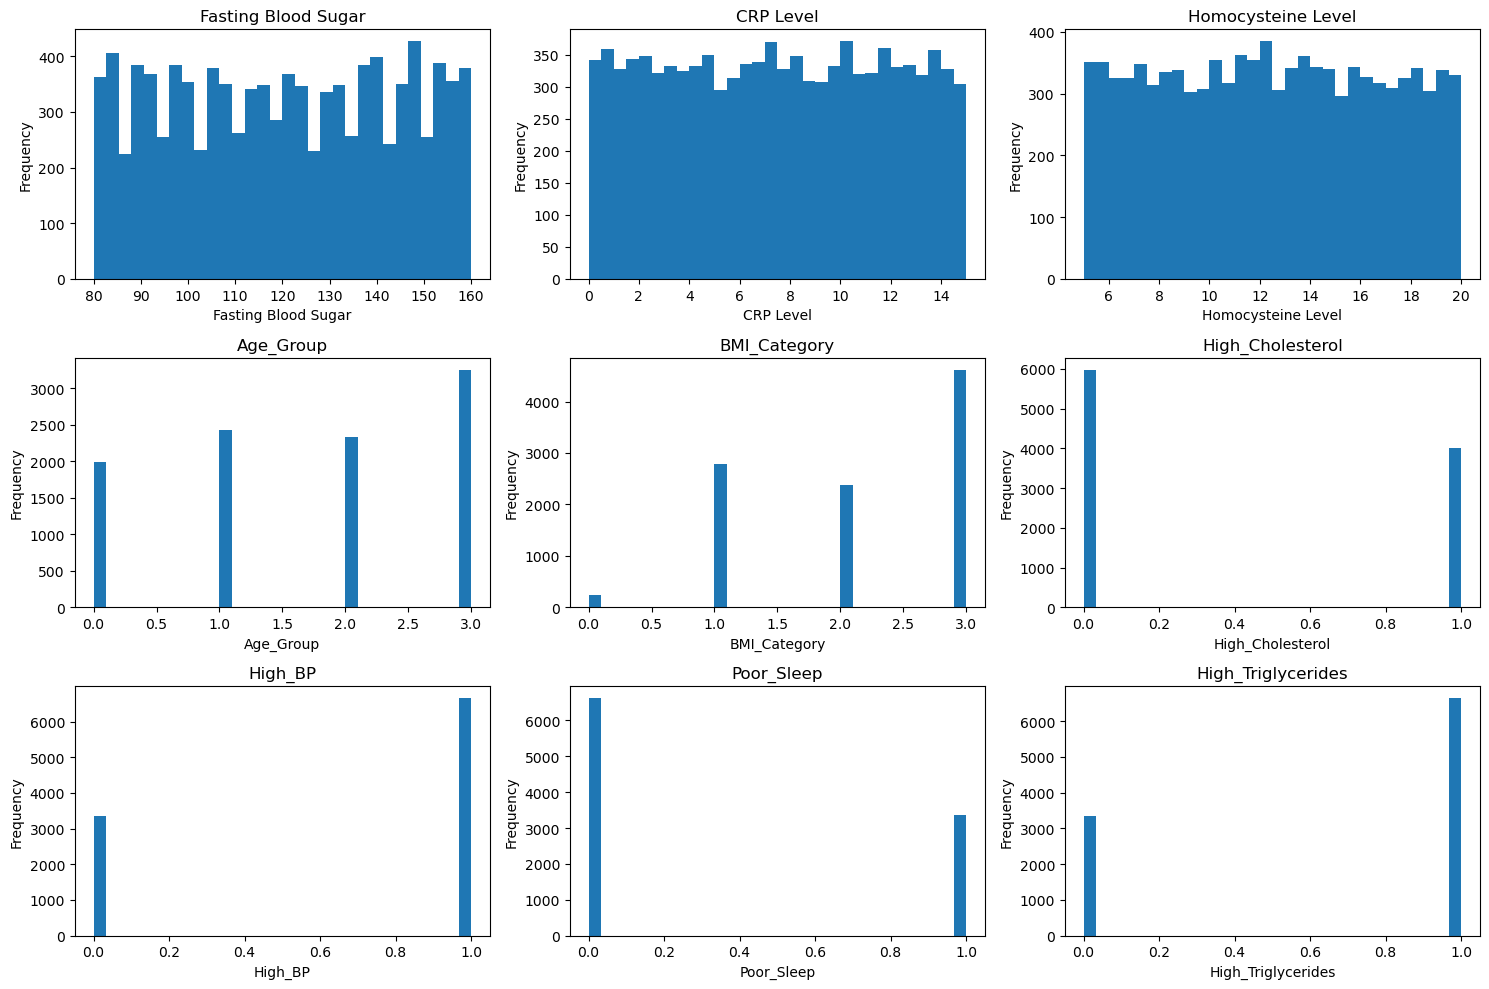

In [52]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Box Plots

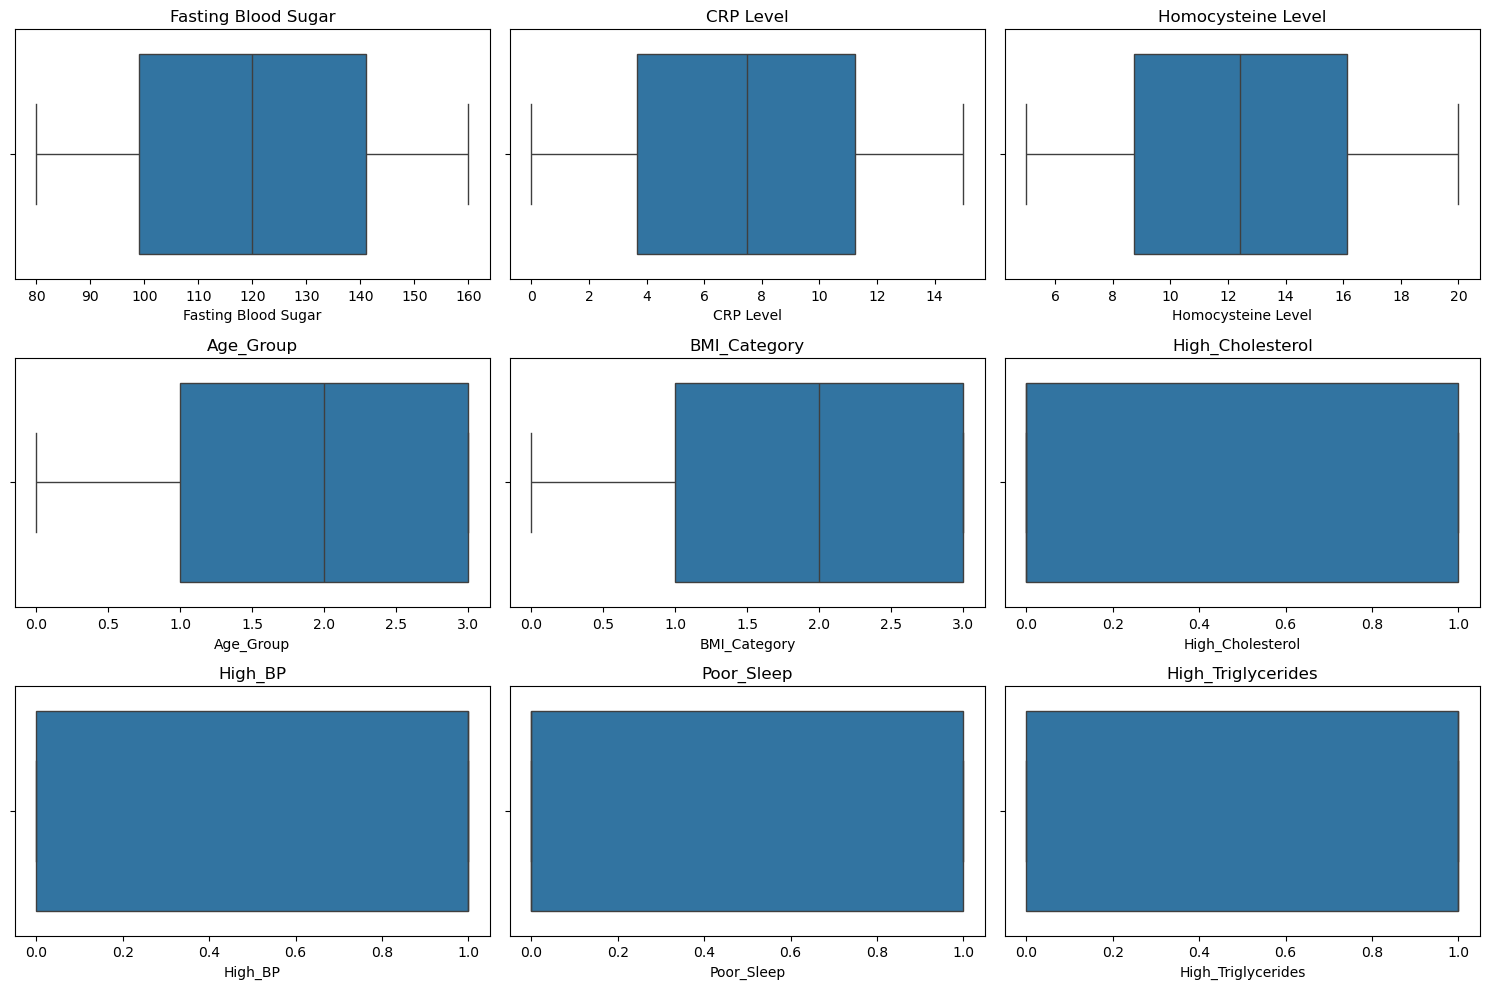

In [58]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Count Plots

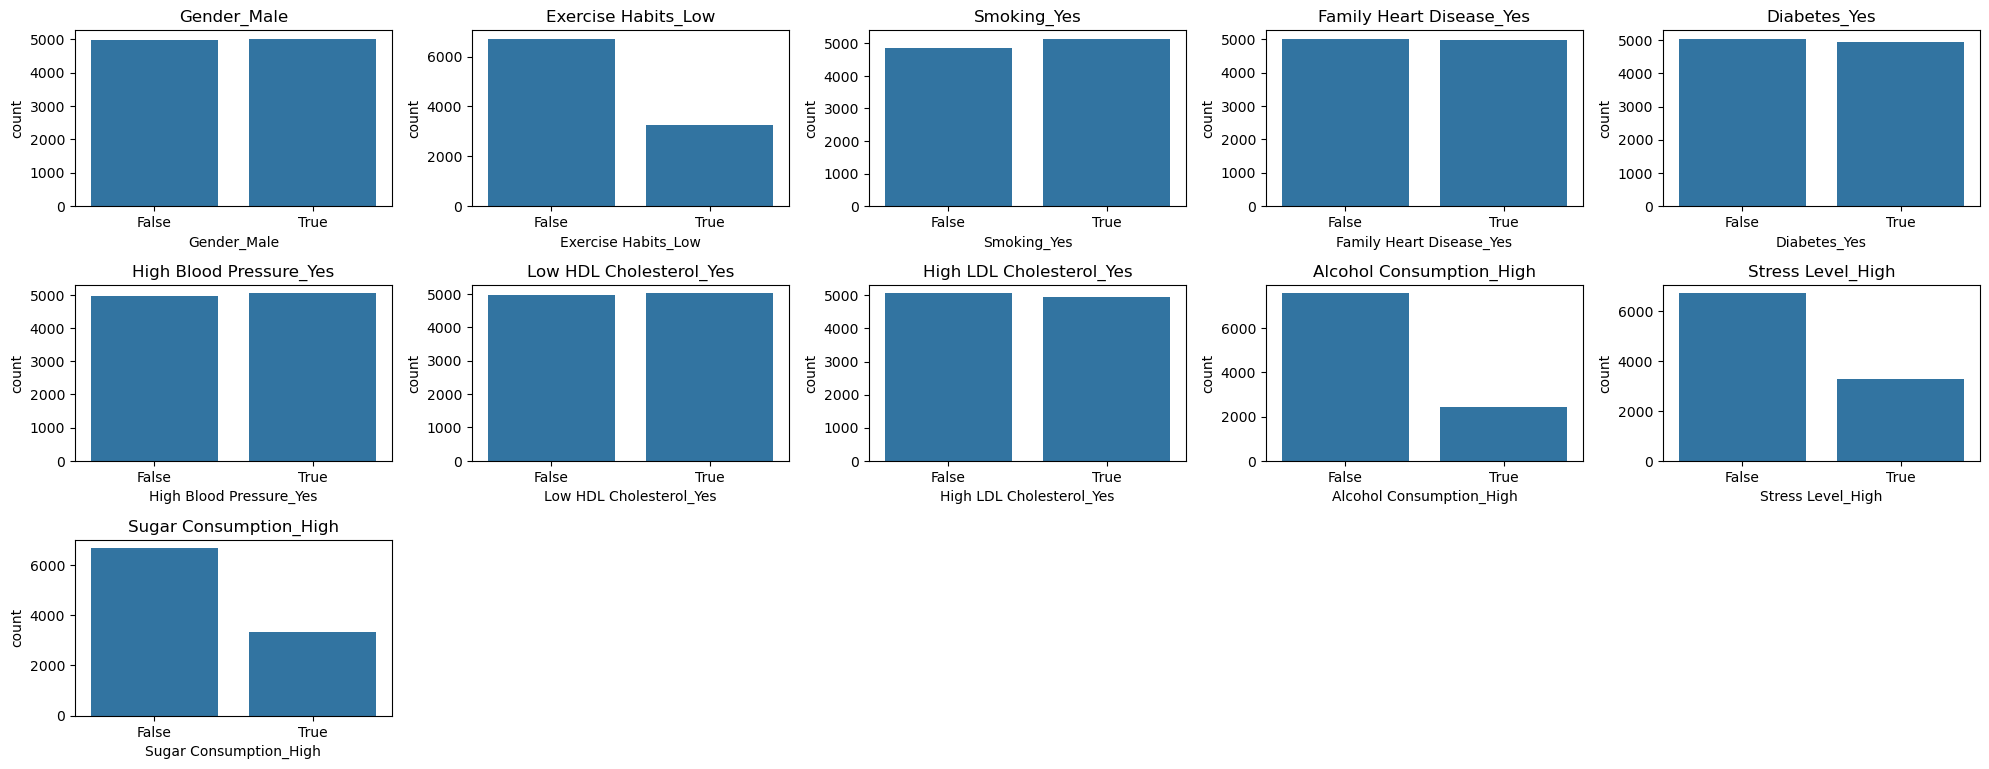

In [60]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 5, i)
    sns.countplot(x=df[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

## Observations

- **Continuous variables** (Fasting Blood Sugar, CRP Level, Homocysteine Level) show roughly **uniform and symmetric distributions** with **no visible outliers**.

- **Discrete numerical variables** (Age_Group, BMI_Category) are **ordinal in nature** and show a **negative skew**, with higher categories (especially Group 3) being more frequent.

- **Binary health indicators** (High_Cholesterol, High_BP, Poor_Sleep, High_Triglycerides) exhibit **class imbalance**:
  - High_BP and High_Triglycerides are skewed toward positive (1).
  - High_Cholesterol and Poor_Sleep are skewed toward negative (0).

- **Categorical variables** show mixed balance:
  - Near **50/50 balance** in core medical factors (Gender, Family Heart Disease, Diabetes, BP, HDL, LDL).
  - **Majority False** in lifestyle-related factors (Low Exercise, High Alcohol, High Stress, High Sugar).

- **Smoking status** remains relatively balanced, with a slight majority in the positive class compared to other lifestyle features.

# Bivariate & Multivariate Analysis

## Scatter plots

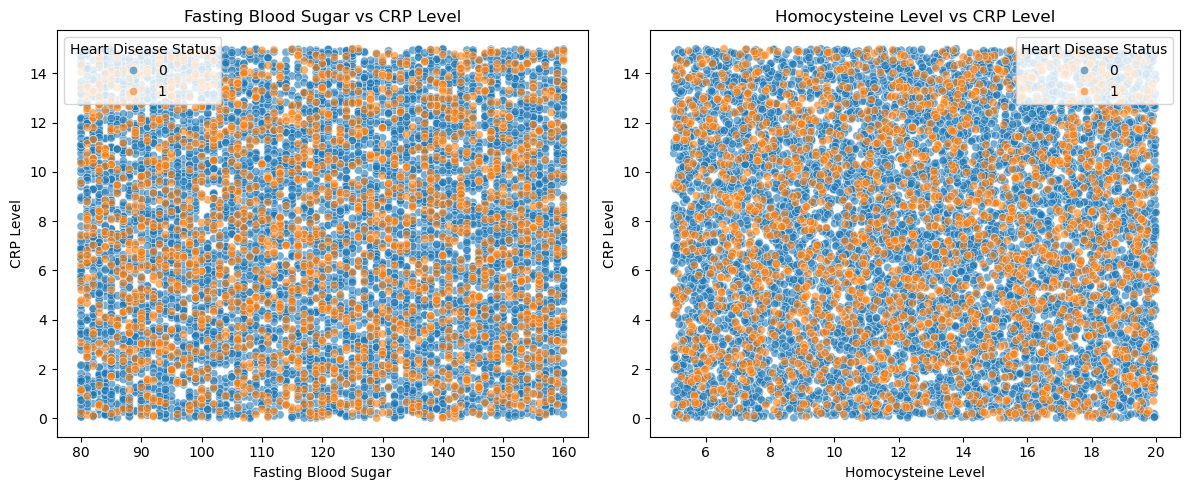

In [62]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df["Fasting Blood Sugar"],
    y=df["CRP Level"],
    hue=df["Heart Disease Status"],
    alpha=0.6
)
plt.title("Fasting Blood Sugar vs CRP Level")

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=df["Homocysteine Level"],
    y=df["CRP Level"],
    hue=df["Heart Disease Status"],
    alpha=0.6
)
plt.title("Homocysteine Level vs CRP Level")

plt.tight_layout()
plt.show()

## Bar Plots

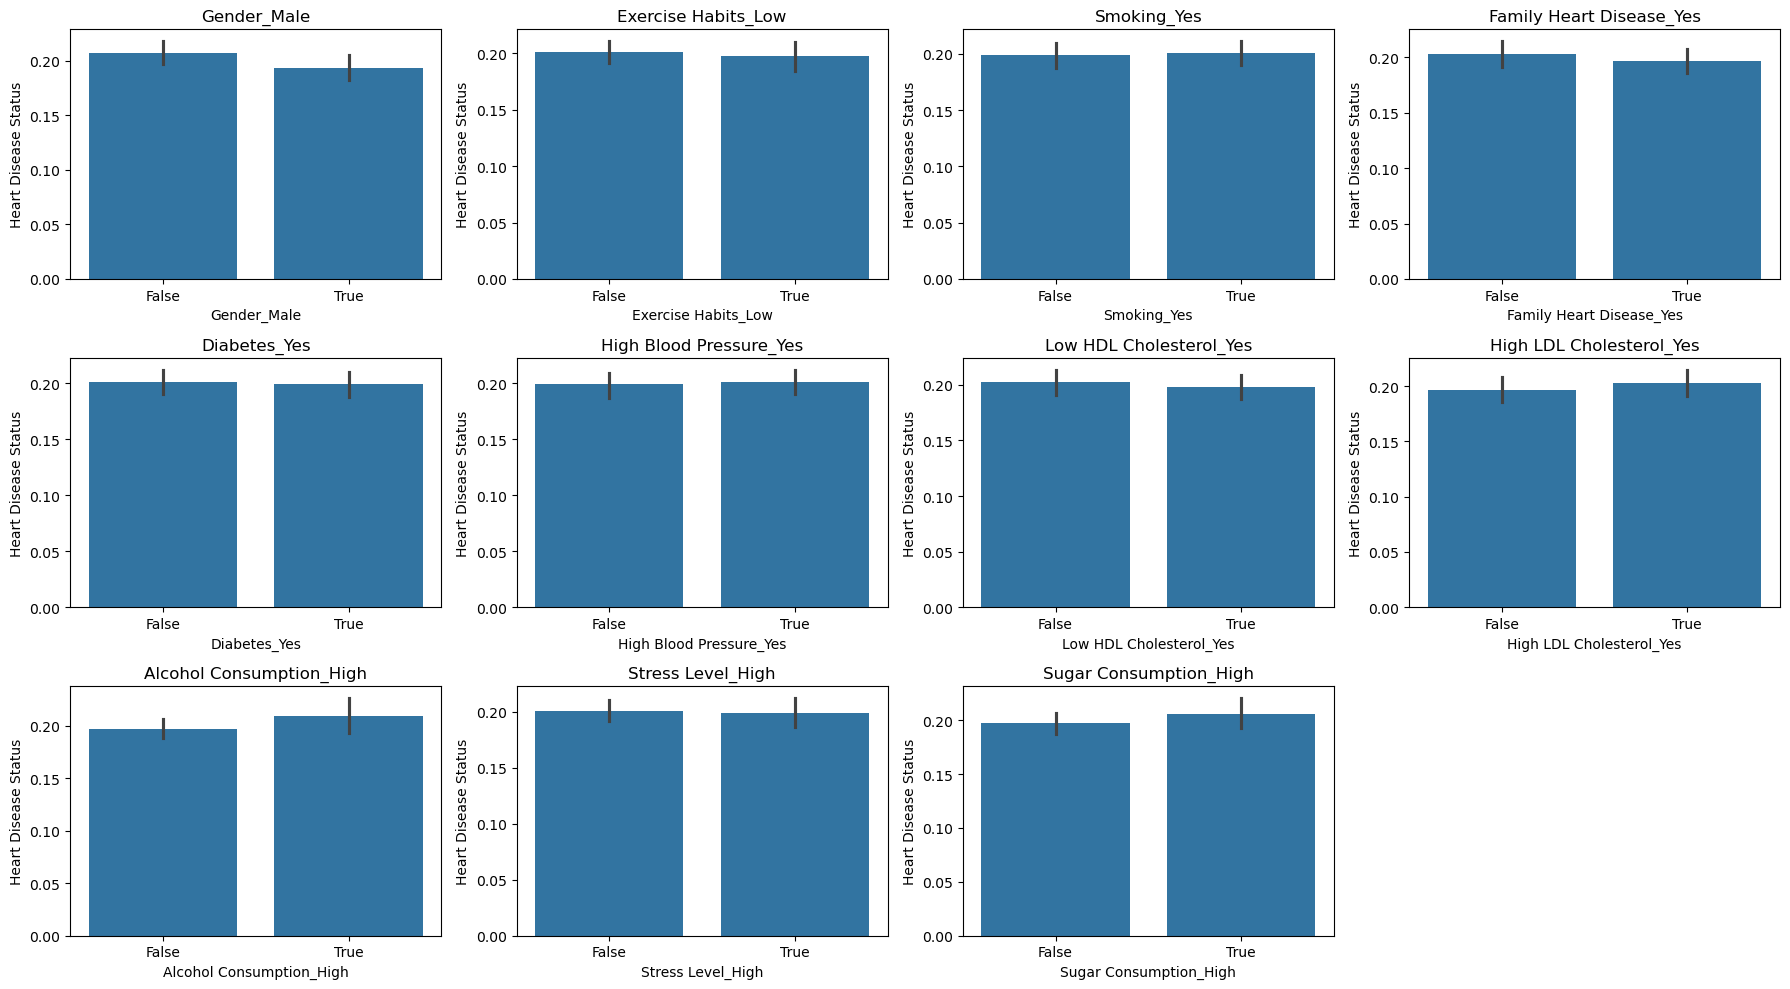

In [65]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 4, i)
    sns.barplot(
        x=df[col],
        y=df["Heart Disease Status"]
    )
    plt.title(col)

plt.tight_layout()
plt.show()

## Heatmap

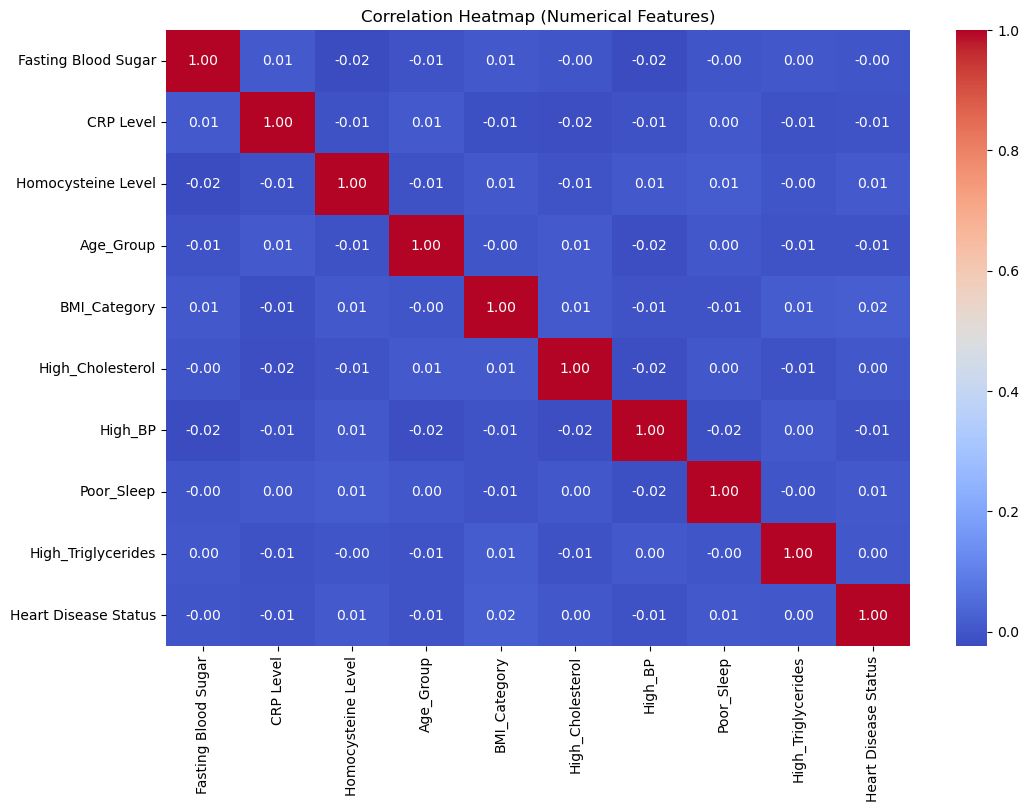

In [66]:
plt.figure(figsize=(12, 8))

corr_matrix = df[num_cols + ["Heart Disease Status"]].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## Observations

- **Correlations:**  
  - Numerical features show **negligible linear correlations** with each other and with the target.  
  - Correlation coefficients lie close to zero (≈ −0.02 to 0.02), indicating **feature independence**.  
  - No single numerical variable (e.g., Fasting Blood Sugar, CRP Level) is a strong linear predictor of heart disease.

- **Trends (Categorical vs Target):**  
  - Core medical and lifestyle features (Smoking, Diabetes, High Blood Pressure, Gender, Exercise) show **nearly identical heart disease rates** across categories (~20%).  
  - Alcohol and sugar consumption exhibit only **minor, statistically insignificant increases**, with heavy overlap across groups.

- **Interactions & Patterns:**  
  - Scatter plots show **complete overlap** between heart disease and non–heart disease cases.  
  - **No visible clusters or separable patterns** in continuous variables.  
  - Findings suggest predictive power, if any, likely comes from **complex non-linear interactions** rather than direct linear relationships.

# Outlier Detection & Handling

## Identification via Box Plots

- **Method Used:** Visual inspection using box plots.
- **Features Analyzed:**  
  - Fasting Blood Sugar  
  - CRP Level  
  - Homocysteine Level  
- **Observations:**  
  - The data for all three features is uniformly distributed within the whiskers.  
  - No points lie outside the **1.5 × IQR** boundary.

## Handling Decision & Justification

- **Decision:** Retain all data points (no outlier removal).

- **Justification:**  
  - No outliers were detected using **visual methods (box plots)**.  
  - Feature values are cleanly bounded within realistic medical ranges  
    - Fasting Blood Sugar: 80–160  
    - CRP Level: 0–15  

- **Impact on Dataset:**  
  - No data loss occurs.  
  - The model is trained on the full range of observed values, which is important given the uniform distributions.  
  - Retaining all points allows the model to correctly learn the **absence of strong correlations** between these features and the target variable.

# Advanced / Niche Visualizations

## Box Plot

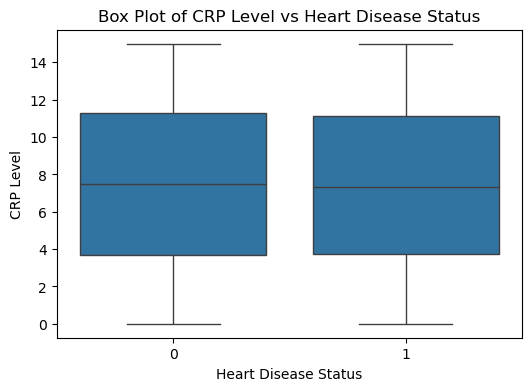

In [73]:
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=df['CRP Level'])
plt.xlabel("Heart Disease Status")
plt.ylabel("CRP Level")
plt.title("Box Plot of CRP Level vs Heart Disease Status")
plt.show()

### Observation

* **Why used:** To compare the distribution of a continuous variable (like CRP Level) across target class to see if the feature helps distinguish between those with and without heart disease.
* **Extra information:** This provides a direct comparison of medians and quartiles between groups, revealing whether the feature's distribution shifts significantly based on the target status

## Violin Plot

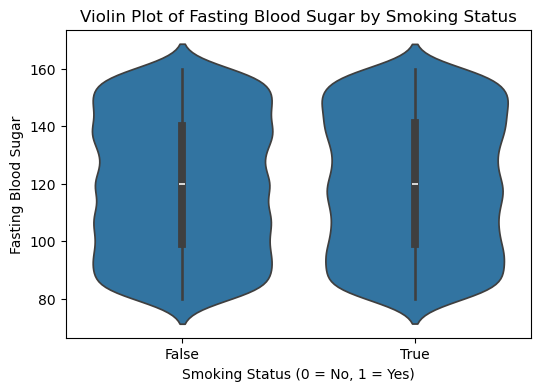

In [74]:
plt.figure(figsize=(6,4))
sns.violinplot(x=df['Smoking_Yes'], y=df['Fasting Blood Sugar'])
plt.xlabel("Smoking Status (0 = No, 1 = Yes)")
plt.ylabel("Fasting Blood Sugar")
plt.title("Violin Plot of Fasting Blood Sugar by Smoking Status")
plt.show()

### Observation

This violin plot was used to visualize the **full distribution and density** of fasting blood sugar levels across smoking categories, rather than relying only on summary statistics.

It provides additional insight by revealing the **shape of the distribution**—including potential clusters, spread, or multiple peaks—that would typically be hidden in simpler plots such as box plots.

# Final Dataset Check

## Final Shape

In [75]:
df.shape

(10000, 36)

## Dataset Changes

**Rows**
- No rows were removed or added during preprocessing.
- The dataset size remained unchanged, ensuring no loss of information.

**Columns Modified**
- The target variable **Heart Disease Status** was separated from the feature set during analysis and later rejoined.
- Categorical variables were converted into numerical form using **One-Hot Encoding (OHE)** via `get_dummies`.
- All binary categorical features were explicitly cast to **integer (0/1)** format for consistency and reuse without re-encoding.

**Columns Created (Feature Engineering)**
- **Age_Group:** Discretized version of Age to capture non-linear risk patterns across life stages.
- **BMI_Category:** Categorical BMI bands converted into ordinal integer values.
- **High_Cholesterol:** Indicator derived from cholesterol level thresholds.
- **High_BP:** Binary flag derived from blood pressure values.
- **Poor_Sleep:** Binary indicator based on low sleep duration.
- **High_Triglycerides:** Binary risk indicator from triglyceride levels.

# Key Insights & Summary

1. **Weak Linear Relationships**
   - Numerical features show near-zero correlation with each other and with the target.
   - Linear models alone may not capture patterns well.

2. **Clean and Well-Bounded Data**
   - Biomarkers (Fasting Blood Sugar, CRP, Homocysteine) show uniform distributions with no outliers.
   - No data removal or transformation needed.

3. **Overlapping Class Distributions**
   - Scatter plots show complete overlap between heart disease and non-heart disease cases.
   - Single features are insufficient for class separation.

4. **Balanced Clinical Indicators**
   - Medical variables like diabetes, cholesterol, and family history are nearly balanced.
   - These features are stable and informative.

5. **Imbalance in Lifestyle Factors**
   - High stress, alcohol, and sugar consumption are less frequent.
   - Could affect model learning and require monitoring.

6. **Value of Feature Engineering**
   - Engineered binary features (High_BP, High_Cholesterol, etc.) improve interpretability.
   - Likely to help non-linear and tree-based models.